# **Digit Recognizer**
Neural Networks using Python (Numpy)

> This Colab notebook has Neural Networks implemented. Its a simple 2 Layered Neural Network and trained on the MNIST digit recognizer dataset.






--------------------------------------------------------------------------------

# **About the dataset**

> The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.


> 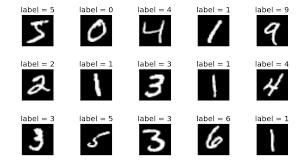




> It has a training set of 60,000 images and a test set of 10,000 images of handwritten digits. The handwritten digit images have been size-normalized and centered in a fixed size of 28×28 pixels. It means that a single image from the MNIST database has a total of 784 pixels which must be analyzed.
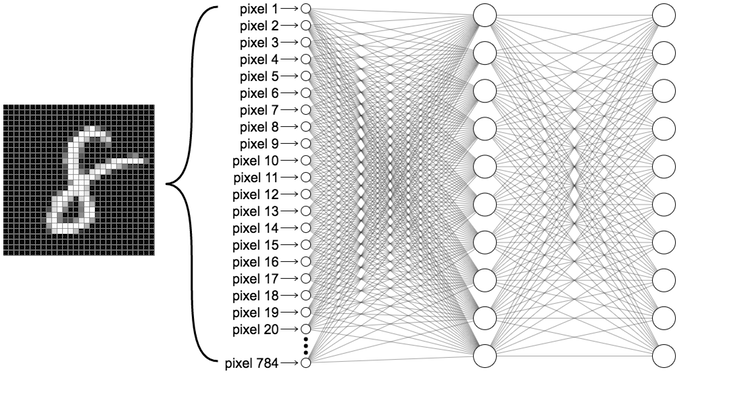

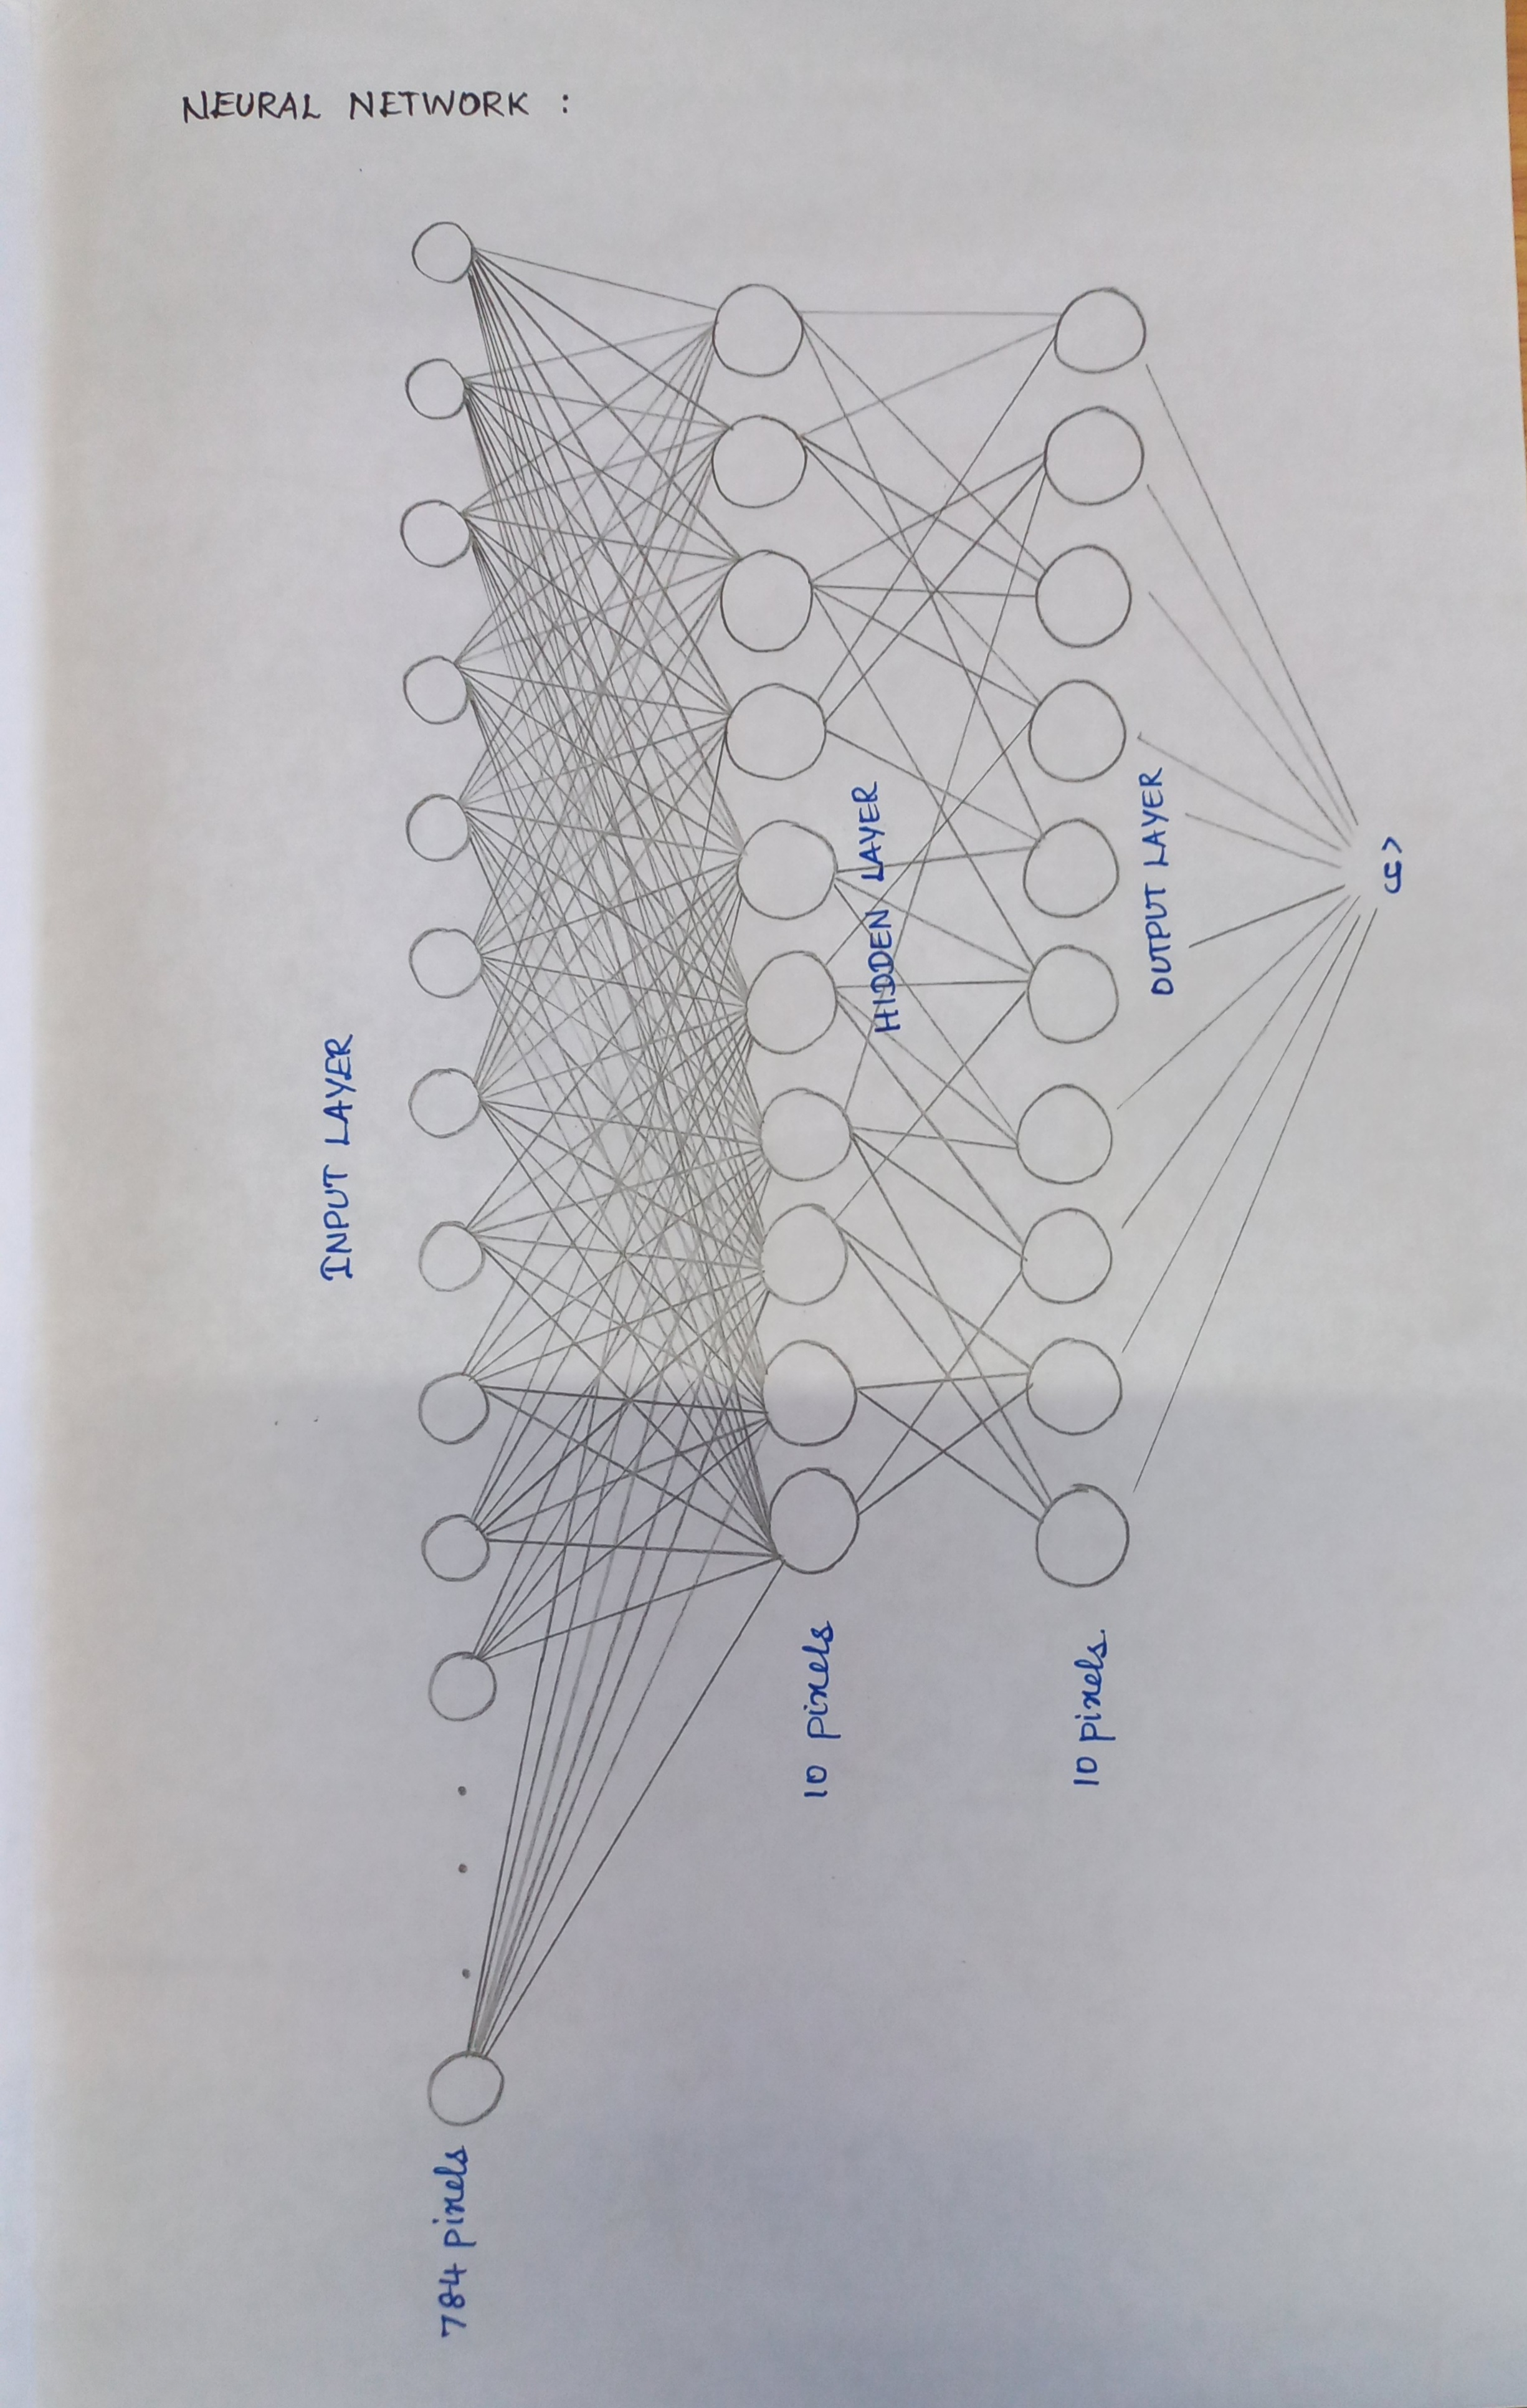

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Reading the data
# ------------------------------------------------------------------------------

data = pd.read_csv("/content/drive/MyDrive/train.csv")
data

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

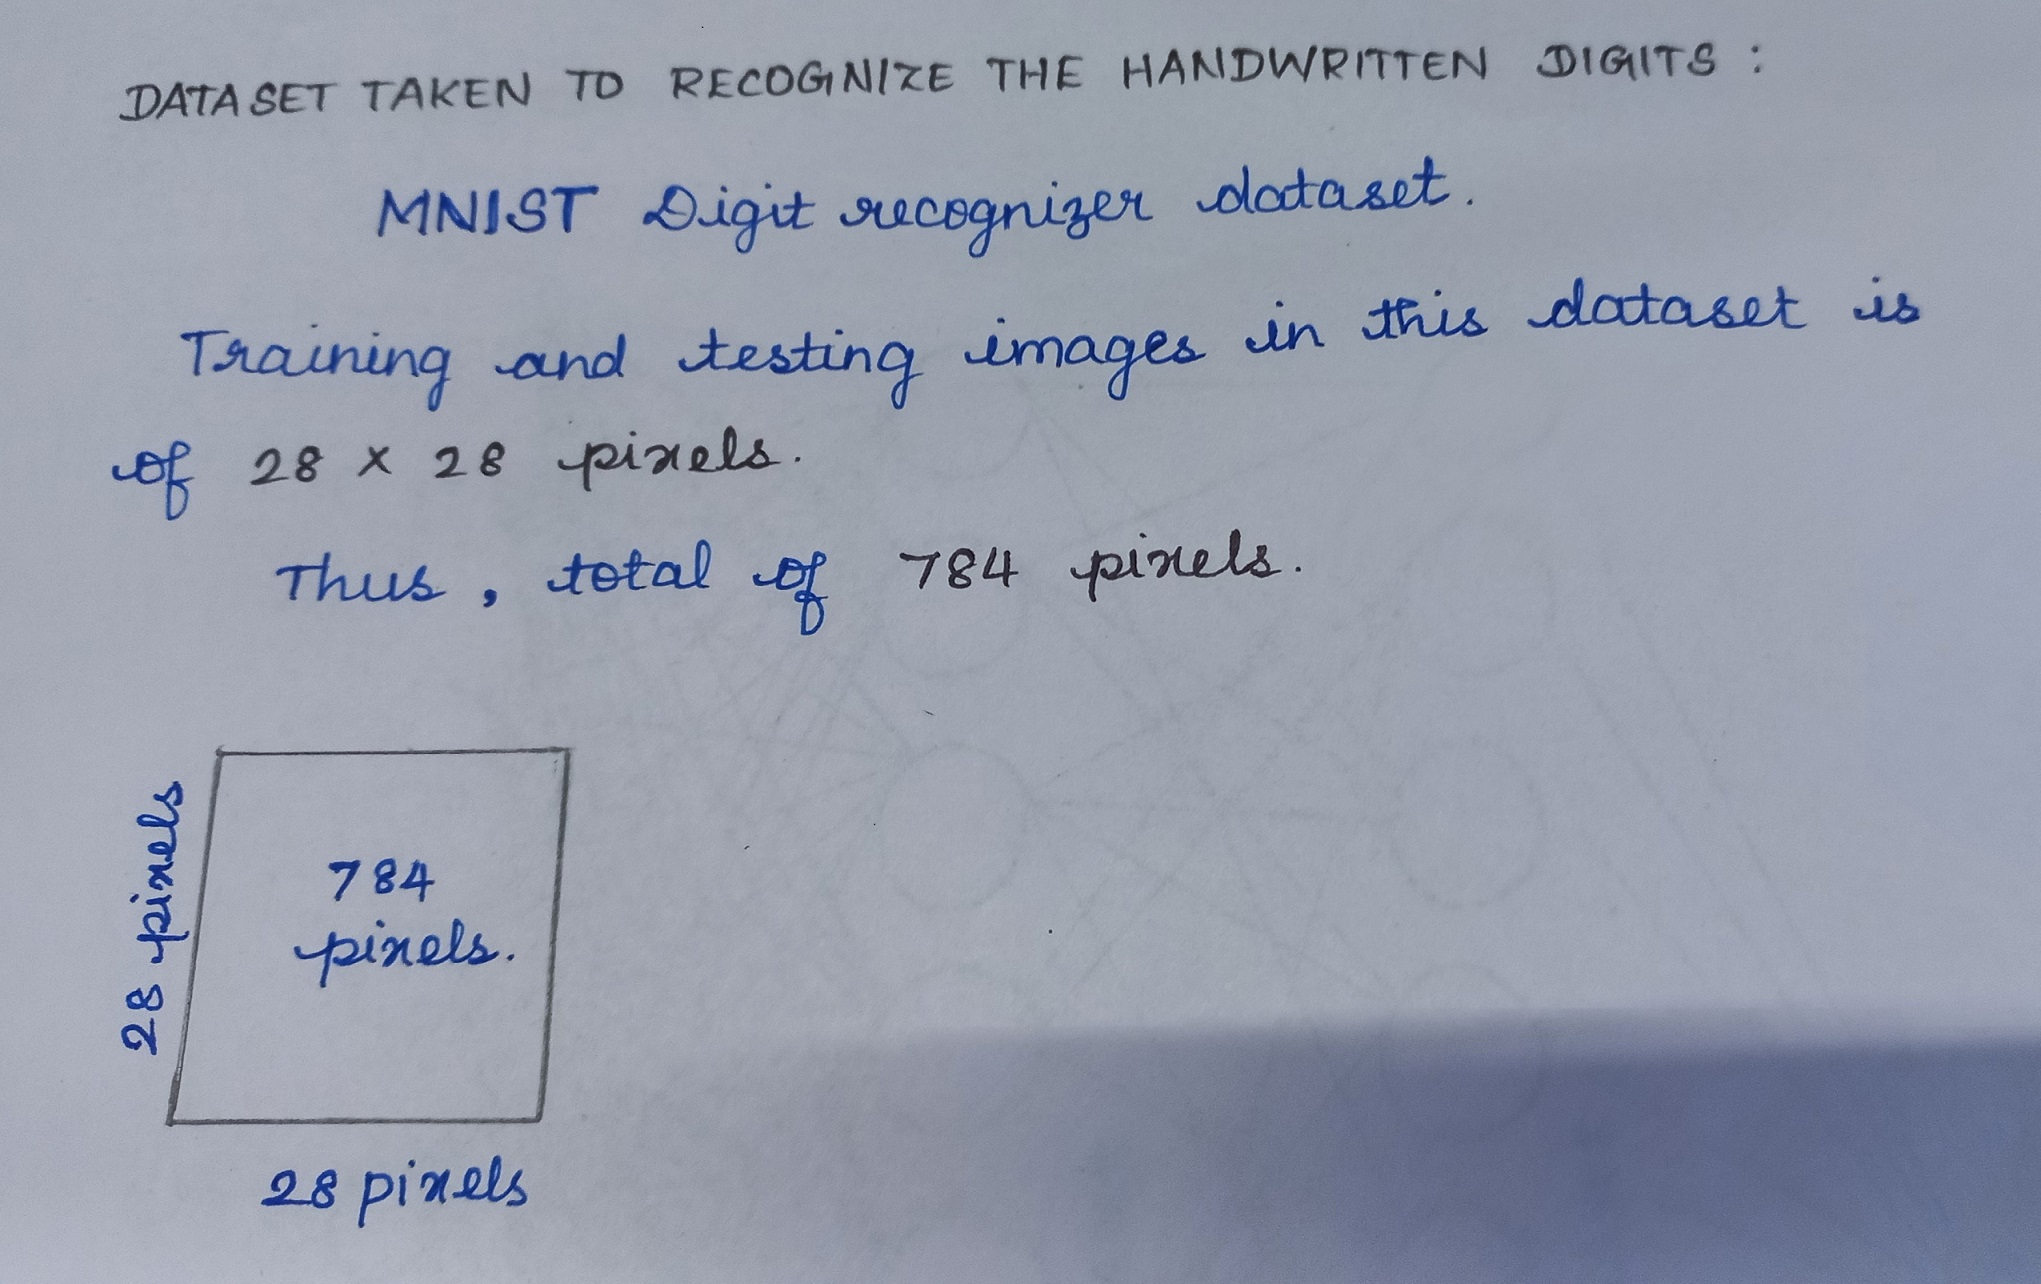

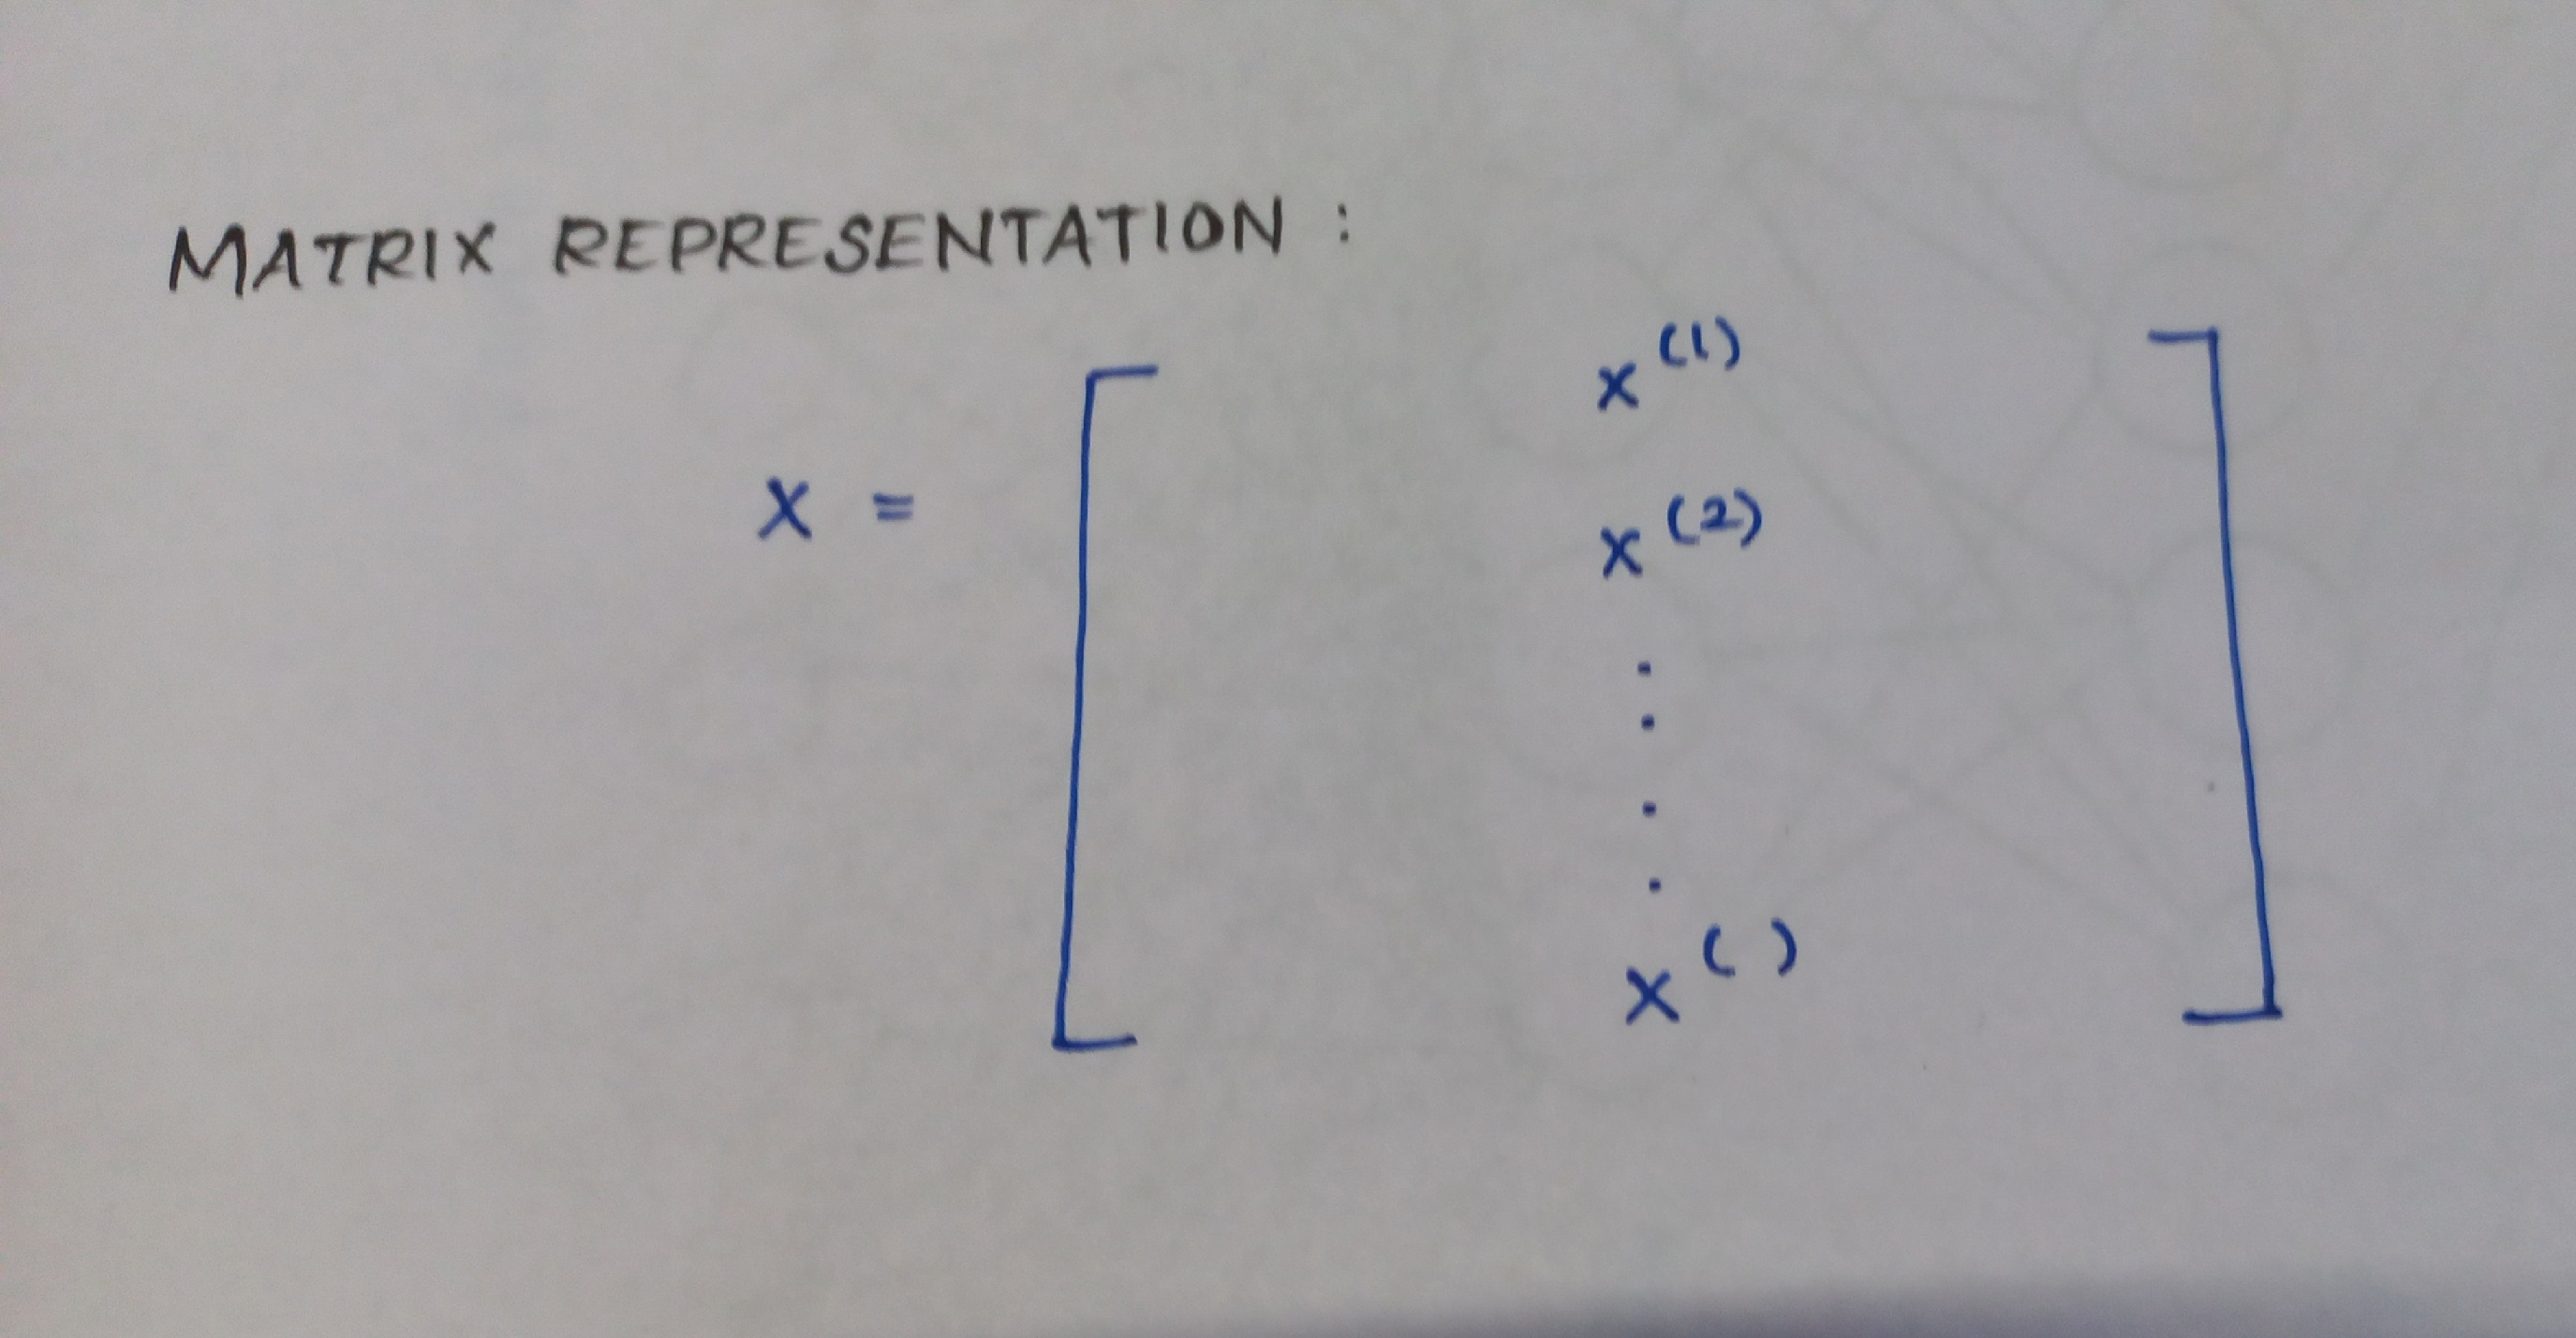

In [ ]:
# Storing the dataset into an array and storing the no of rows and columns
data = np.array(data)
m, n = data.shape

# Shuffling the data before splitting the data for training and testing
np.random.shuffle(data)

# Splitting the data for Test set
# Transposing for our convenience
Test_data = data[ 0:1000 ].T
Test_Y = Test_data[0]
Test_X = Test_data[ 1:n ]
Test_X = Test_X / 255

# Splitting the data for Train set
Train_data = data[ 1000:m ].T
Train_Y = Train_data[0]
Train_X = Train_data[1:n]
Train_X = Train_X / 255


"""
Q. Why do we divide the Train and test data sets by 255 ?
Ans. We perform a grayscale normalization to reduce the effect of illumination's differences.
Moreover the CNN converges faster on [0, 1] data than on [0..255]

0 - Black
255 - White

Only black or white colours, no light grey or grey. If those colours were present
then it would have been less accurate to predict the numbers.

"""

"\nQ. Why do we divide the Train and test data sets by 255 ? \nAns. We perform a grayscale normalization to reduce the effect of illumination's differences.\nMoreover the CNN converges faster on [0, 1] data than on [0..255]\n\n0 - Black\n255 - White\n\nOnly black or white colours, no light grey or grey. If those colours were present\nthen it would have been less accurate to predict the numbers.\n\n"

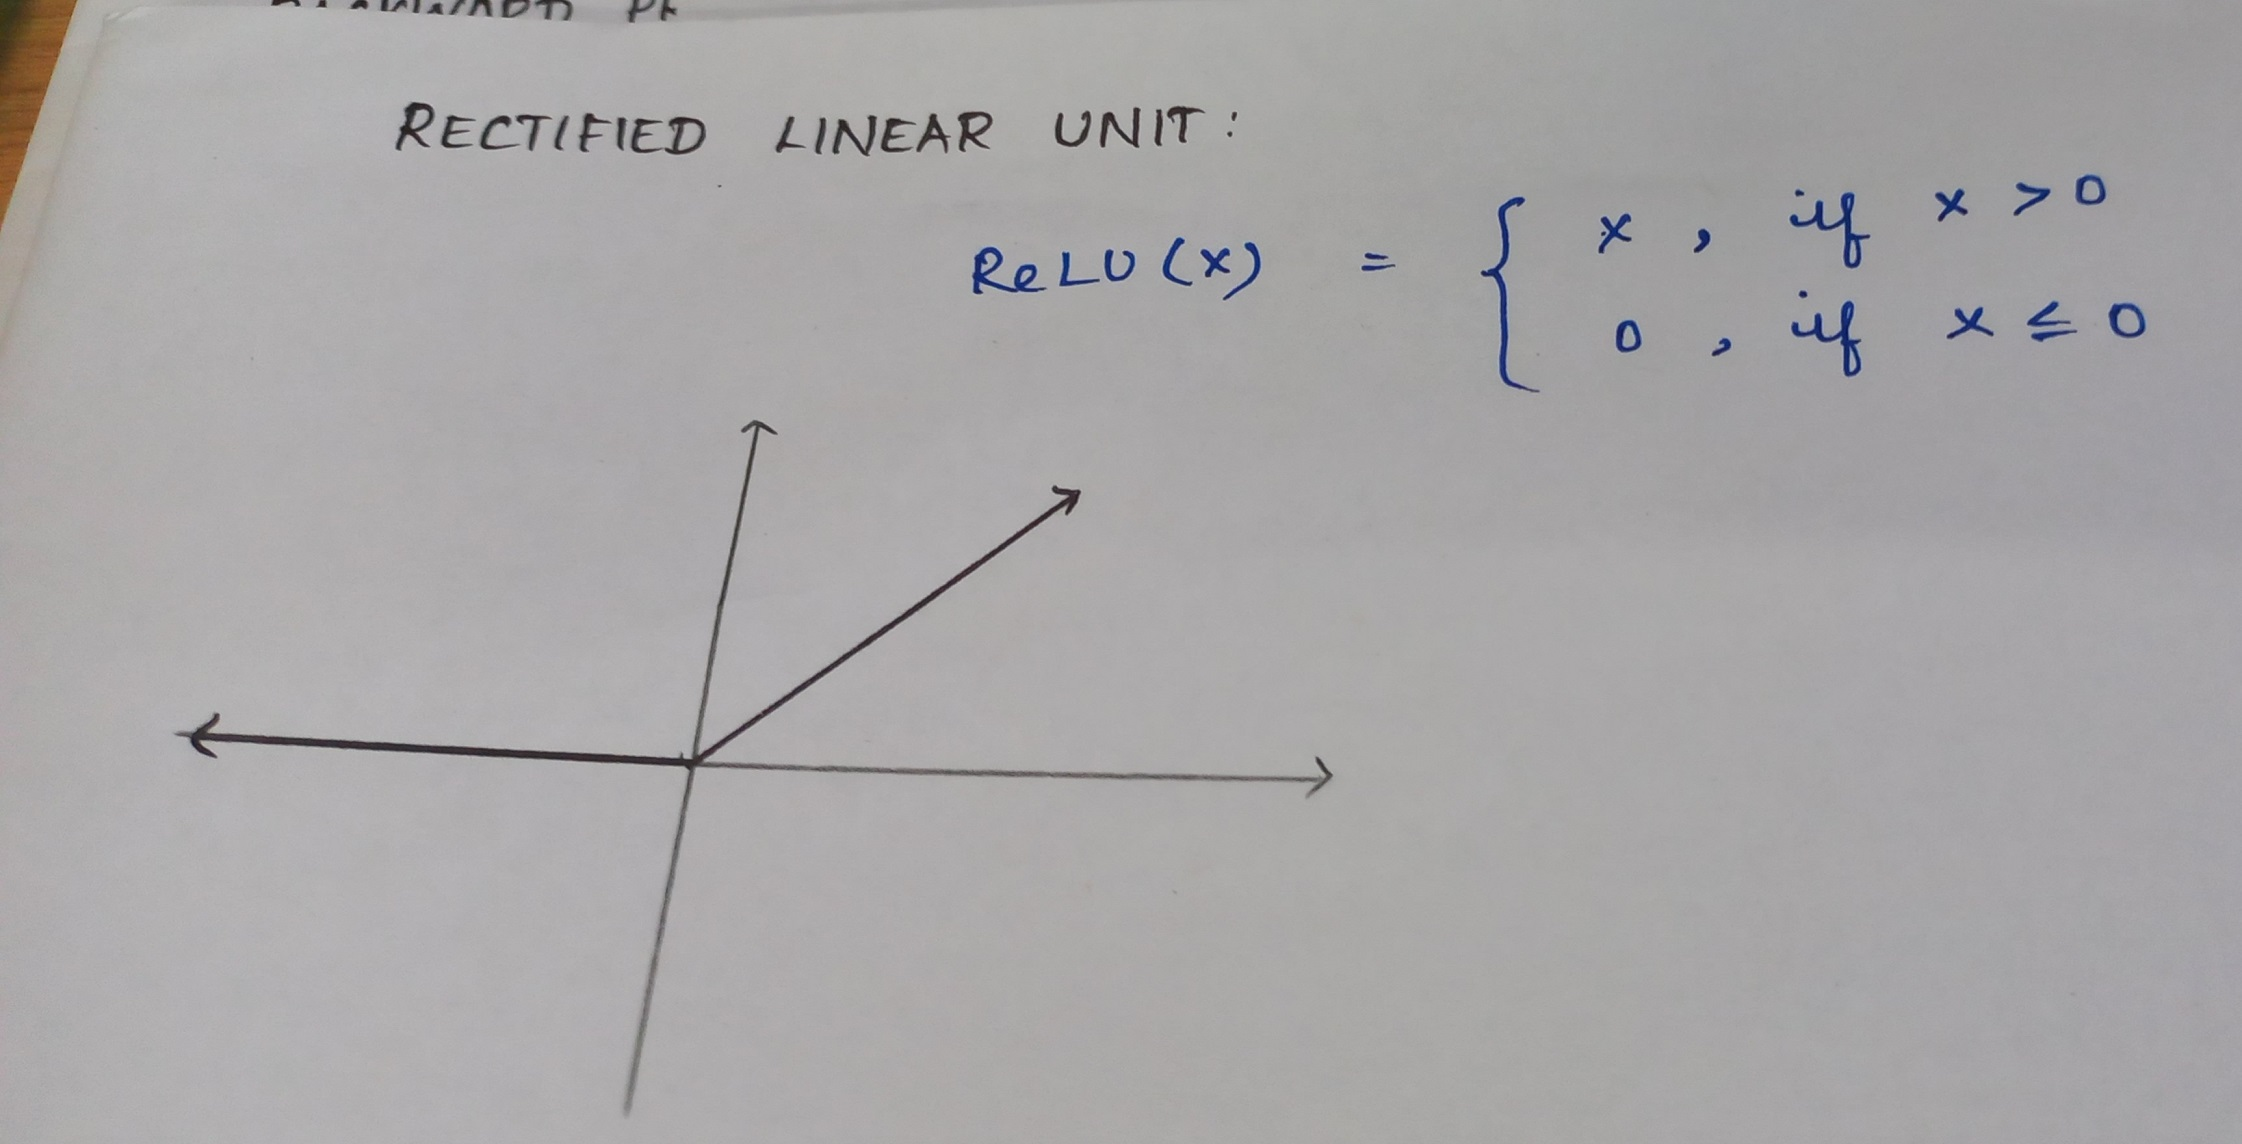

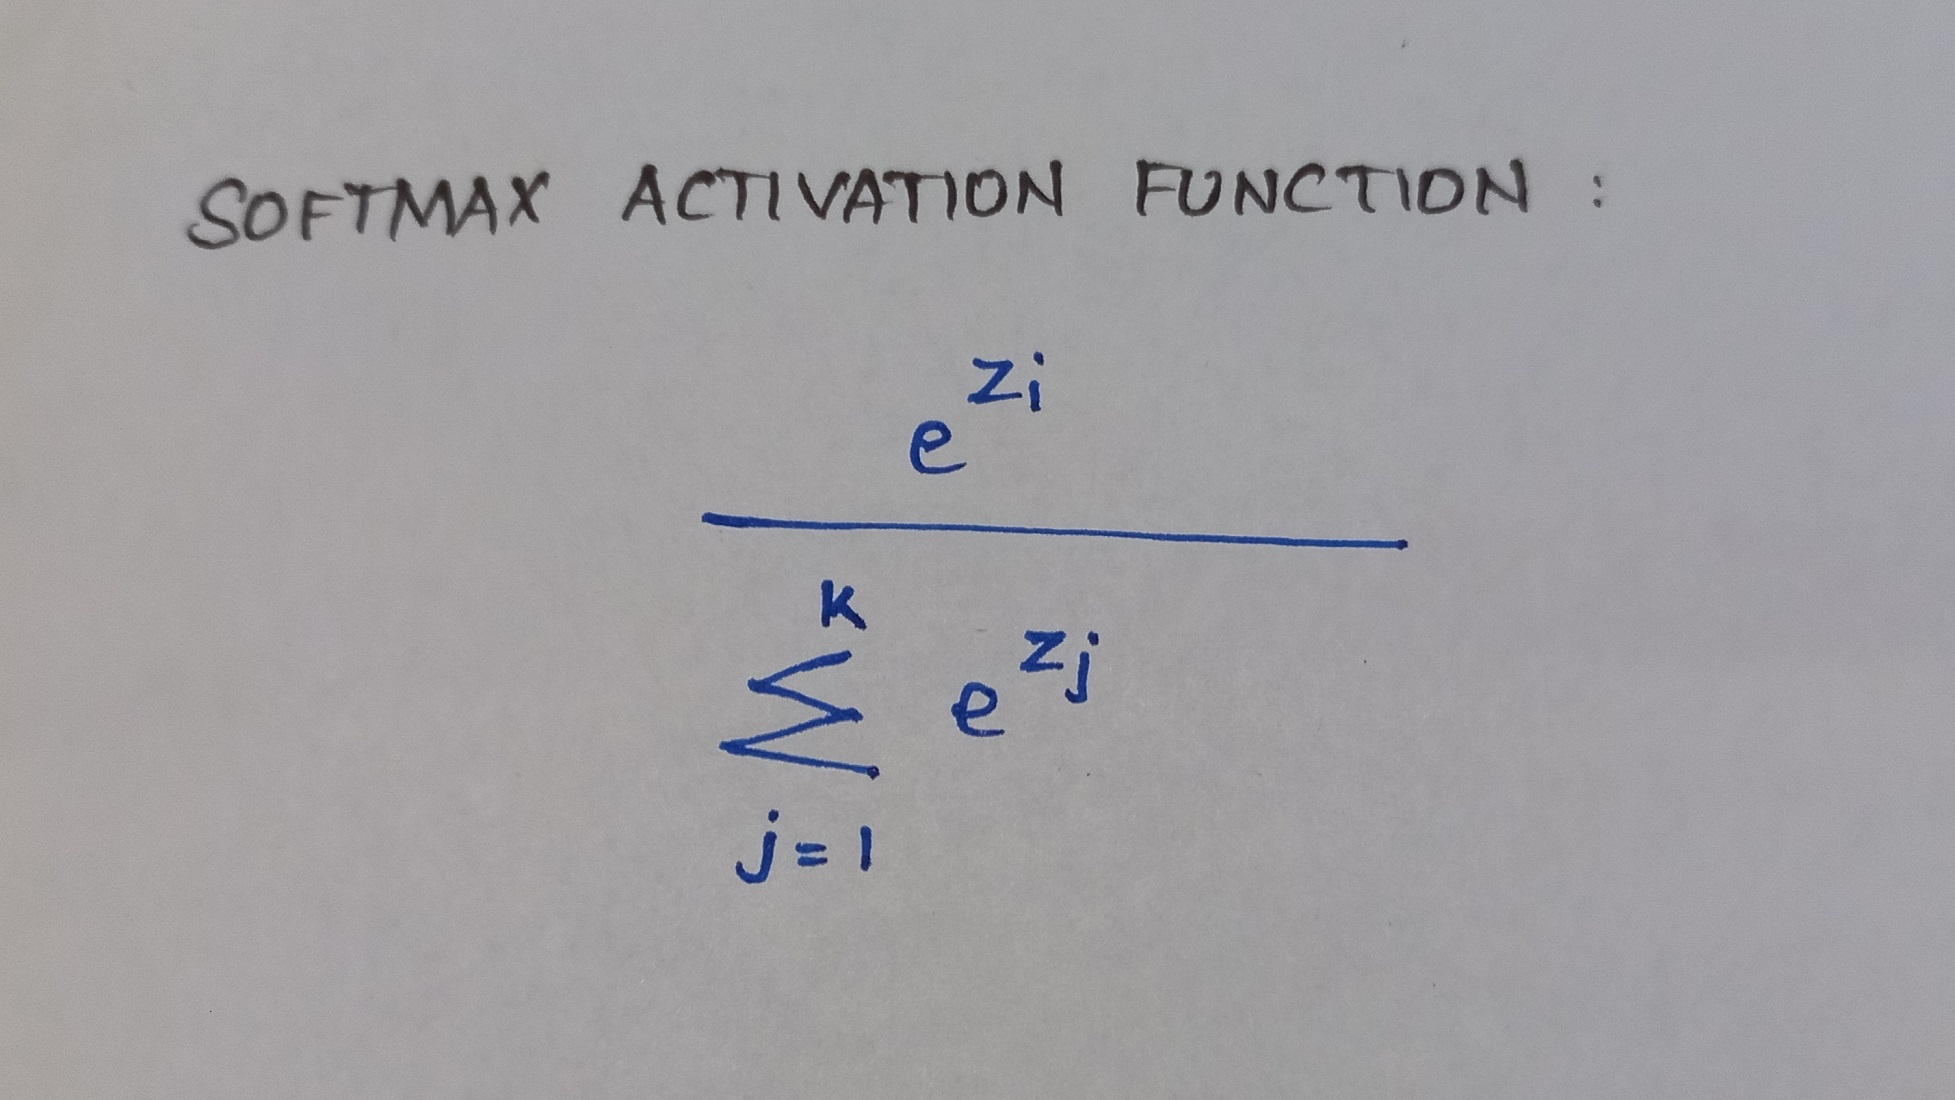

In [ ]:
# Rectified Linear Unit - Activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# Derivative of Rectified Linear Unit
def ReLU_deriv(Z):
    return Z > 0

# Softmax function - Activation function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# One hot encoding the value of Y to fit it into the Algoithm
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

"""
After applying Softmax, each element will be in the range of 0 to 1,
and the elements will add up to 1.
This way, they can be interpreted as a probability distribution.

Labels are 10 digits numbers from 0 to 9. We need to encode
these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

Q. Why Softmax instead of Sigmoid?
Ans. Softmax is used for multi-classification in the Logistic Regression model,
whereas Sigmoid is used for binary classification in the Logistic Regression model.

Q. Why One Hot ?
Ans. Y, that is our prediction, is of integer. We have to put it into a matrix to
get the error that was produced. One hot encoding Y will give a matrix of 0 and
one 1.


"""

' \nAfter applying Softmax, each element will be in the range of 0 to 1, \nand the elements will add up to 1.\nThis way, they can be interpreted as a probability distribution.\n\nLabels are 10 digits numbers from 0 to 9. We need to encode \nthese lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).\n\nQ. Why Softmax instead of Sigmoid?\nAns. Softmax is used for multi-classification in the Logistic Regression model,\nwhereas Sigmoid is used for binary classification in the Logistic Regression model.\n\nQ. Why One Hot ?\nAns. Y, that is our prediction, is of integer. We have to put it into a matrix to\nget the error that was produced. One hot encoding Y will give a matrix of 0 and \none 1.\n\n\n'

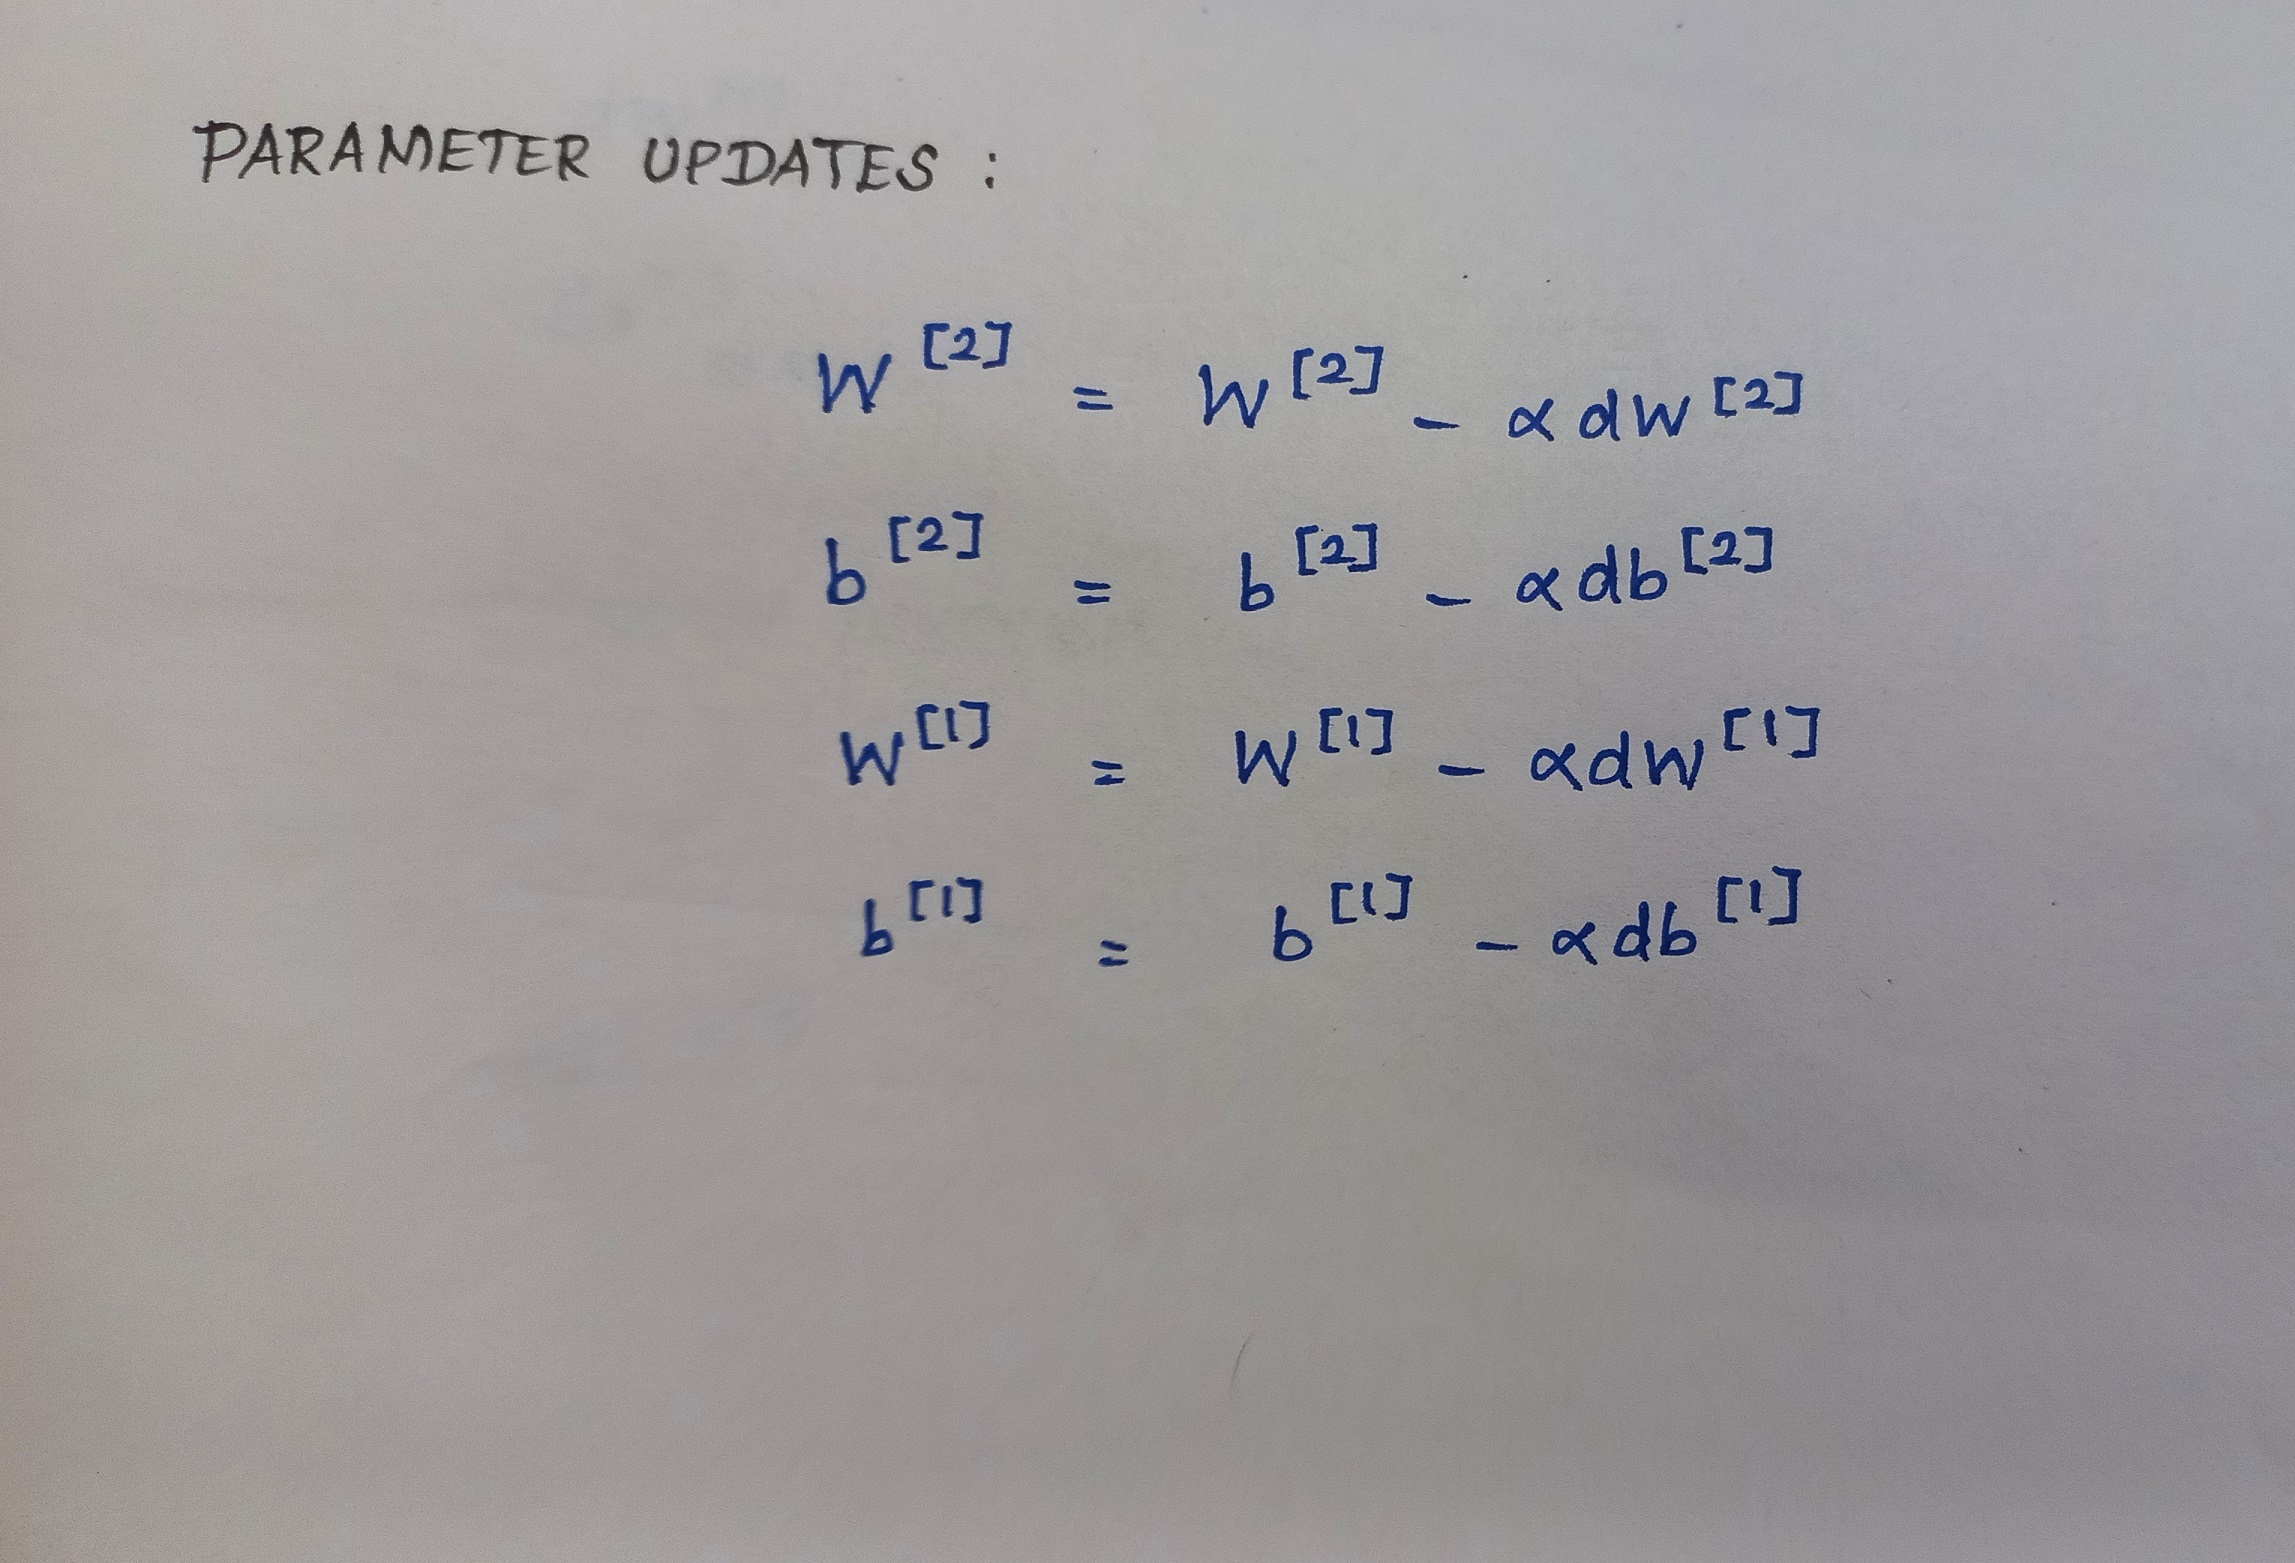

In [ ]:
# Initialize the Parameters - Weights and Basis
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Updating the Parameters for the next iteration
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

"""

Alpha - Learning rate
Learning rate is a parameter, denoted by α (alpha), which is used to tune
how accurately a model converges on a result.

"""

'\n\nAlpha - Learning rate\nLearning rate is a parameter, denoted by α (alpha), which is used to tune \nhow accurately a model converges on a result.\n\n'

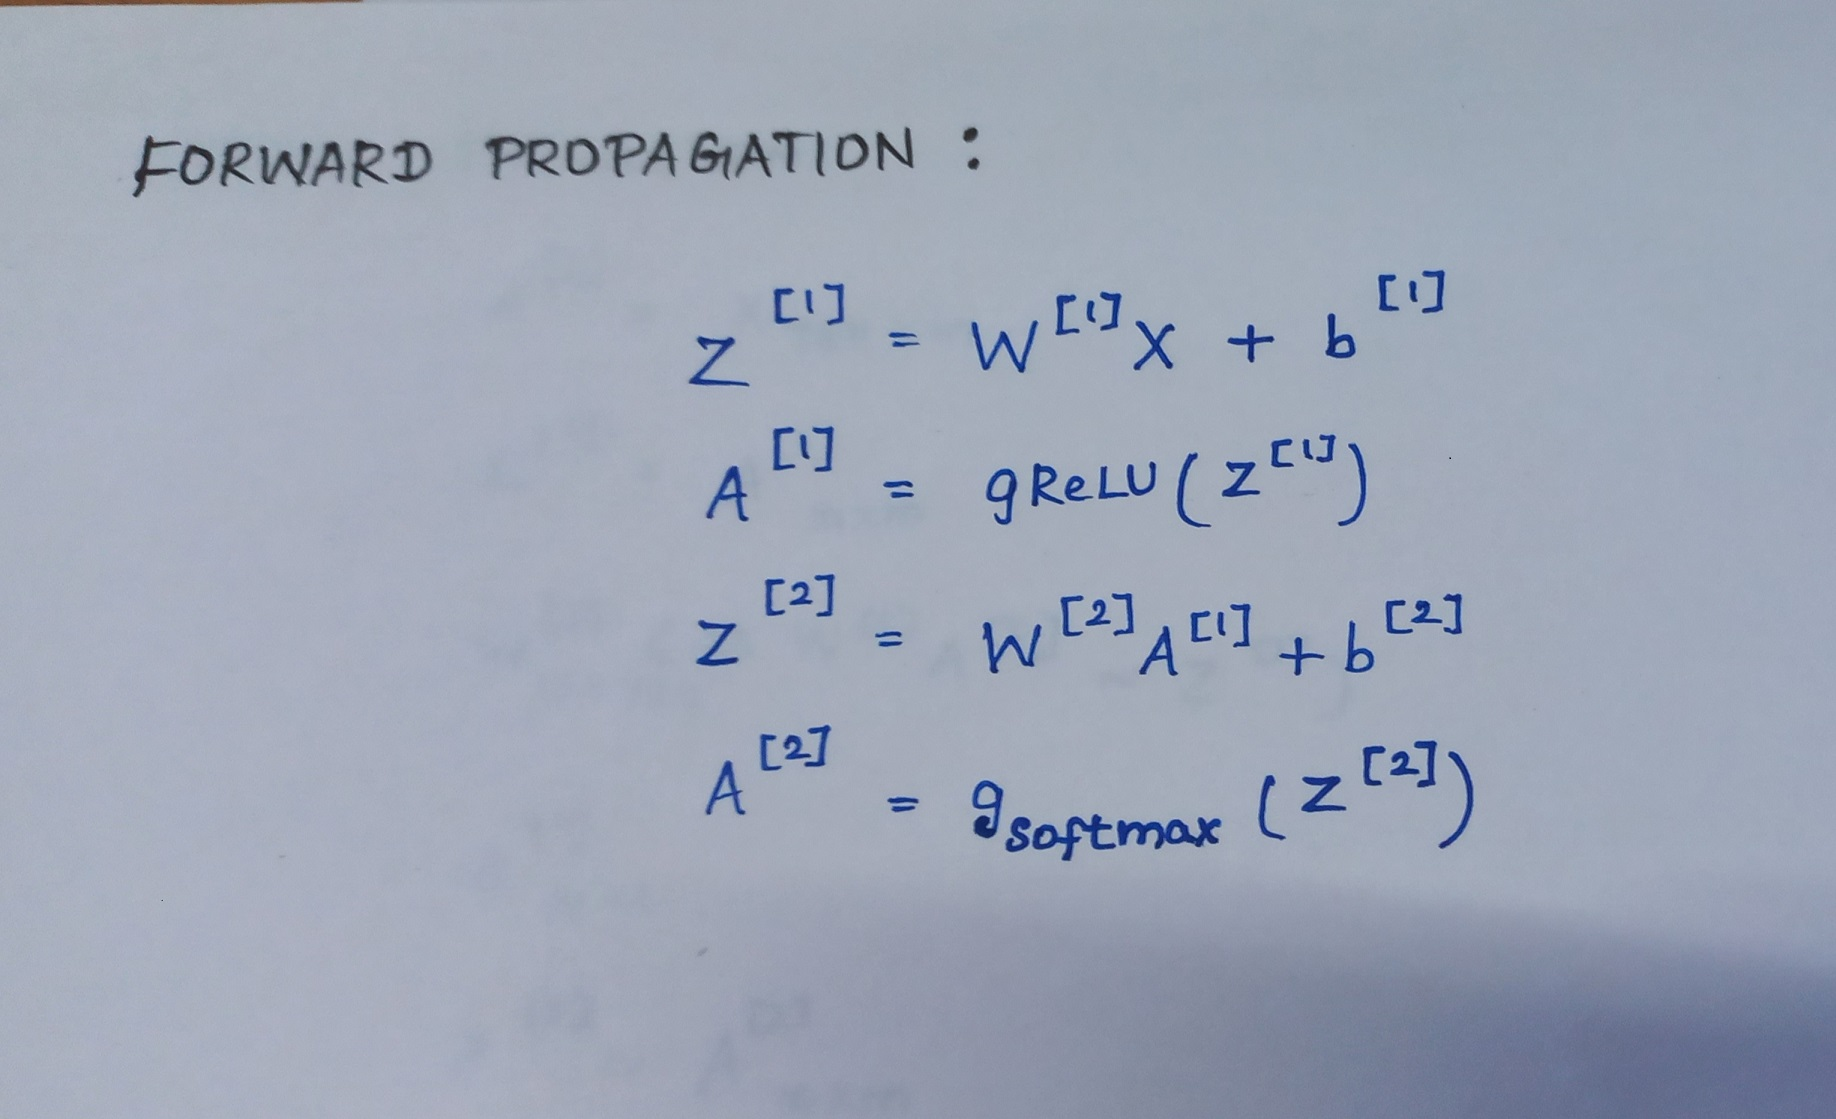

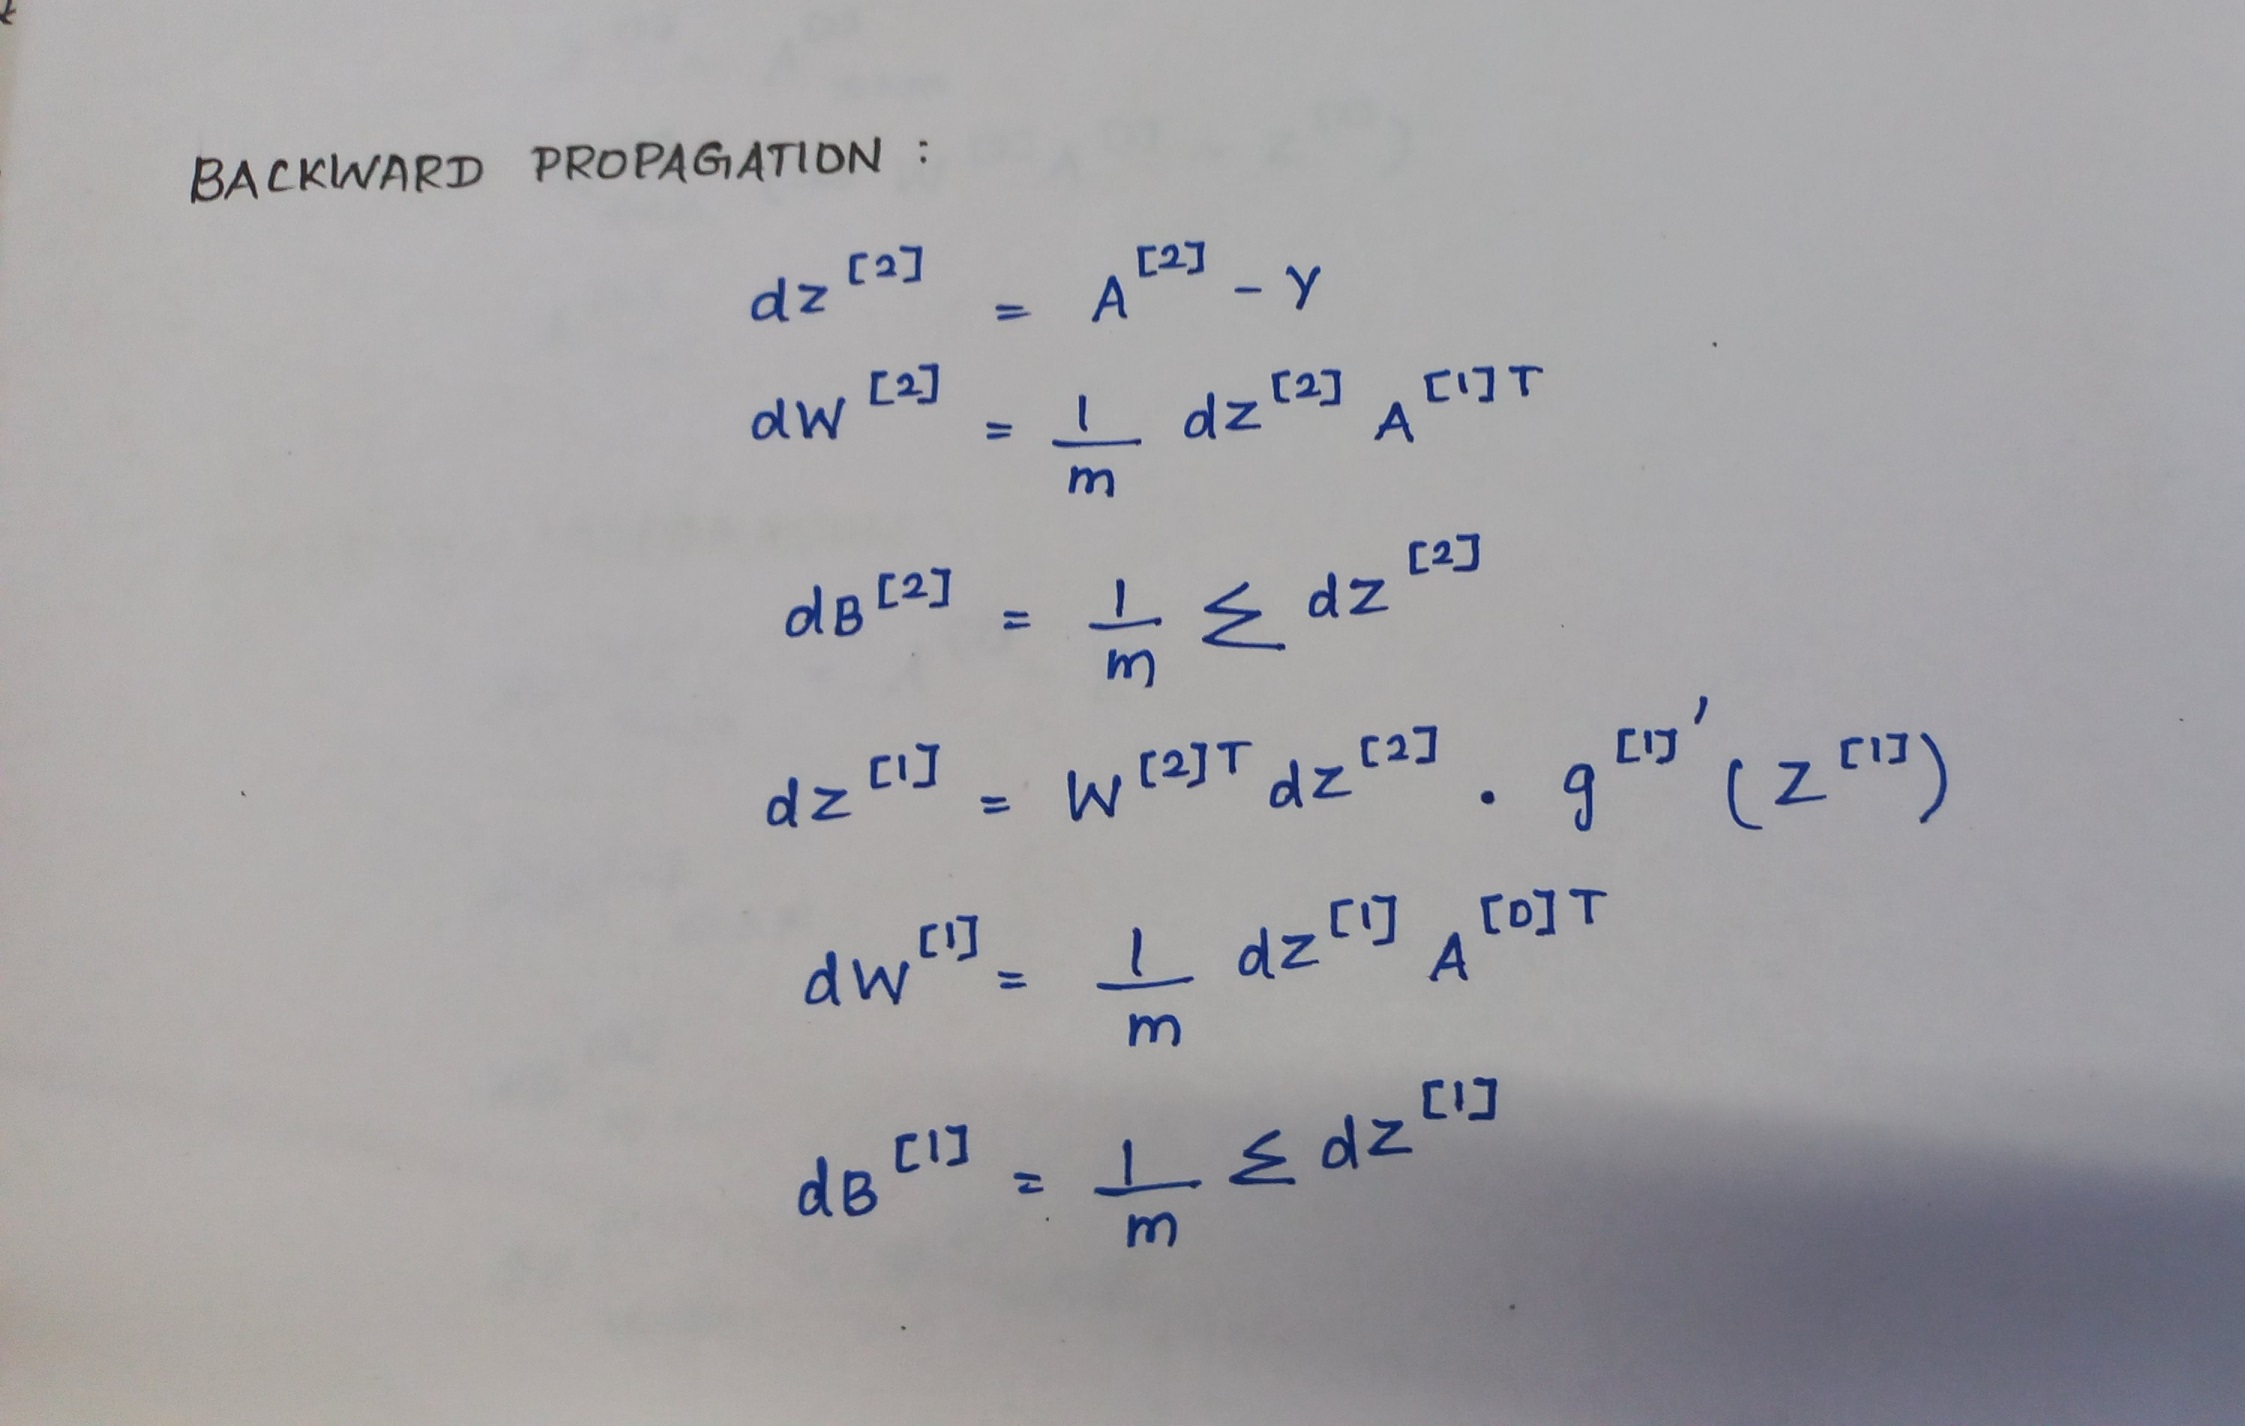

In [ ]:
# Forward Propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Backward Propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


"""

Forward propagation refers to storage and calculation of input data
which is fed in forward direction through the network to generate an output.
Hidden layers in neural network accepts the data from the input layer,
process it on the basis of activation function and pass it to the successive layers.

Backward Propagation is the preferable method of adjusting the weights to reach
the minimized loss function. In this article, we shall explore this second
technique of Backward Propagation in detail by understanding how it works
mathematically, why it is the preferred method.

"""

'\n\nForward propagation refers to storage and calculation of input data \nwhich is fed in forward direction through the network to generate an output.\nHidden layers in neural network accepts the data from the input layer,\nprocess it on the basis of activation function and pass it to the successive layers.\n\nBackward Propagation is the preferable method of adjusting the weights to reach \nthe minimized loss function. In this article, we shall explore this second \ntechnique of Backward Propagation in detail by understanding how it works \nmathematically, why it is the preferred method. \n\n'

In [ ]:
# Get the final prediction
def get_predictions(A2):
    return np.argmax(A2, 0)

# Getting the accuracy of our Prediction
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Gradient descent method
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

"""

The numpy.argmax() function returns indices of the max element of the array in a particular axis.

"""

'\n\nThe numpy.argmax() function returns indices of the max element of the array in a particular axis.\n\n'

In [ ]:
# Make prediction
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Testing our predictions
def test_prediction(index, W1, b1, W2, b2):
    current_image = Train_X[:, index, None]
    prediction = make_predictions(Train_X[:, index, None], W1, b1, W2, b2)
    label = Train_Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    # Reshaping from 1 x 784 matrix t0 28 x 28 to get image. Its of 0's amd 1's
    # So multiply by 255 to get colors.
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

"""

plt.imshow() is a function in the matplotlib library in Python that is used to display images.
The current_image parameter is the image to be displayed. This could be a 2D numpy array (grayscale),
a 3D numpy array (RGB), or a 4D numpy array (RGBA).

The interpolation parameter is an optional parameter that specifies the interpolation method
used to display the image. The default value is 'antialiased', but 'nearest' is also a commonly used option.
'nearest' means that each pixel in the displayed image corresponds directly to a pixel in the original image,
without any interpolation.

"""

"\n\nplt.imshow() is a function in the matplotlib library in Python that is used to display images.\nThe current_image parameter is the image to be displayed. This could be a 2D numpy array (grayscale),\na 3D numpy array (RGB), or a 4D numpy array (RGBA).\n\nThe interpolation parameter is an optional parameter that specifies the interpolation method\nused to display the image. The default value is 'antialiased', but 'nearest' is also a commonly used option.\n'nearest' means that each pixel in the displayed image corresponds directly to a pixel in the original image,\nwithout any interpolation.\n\n"

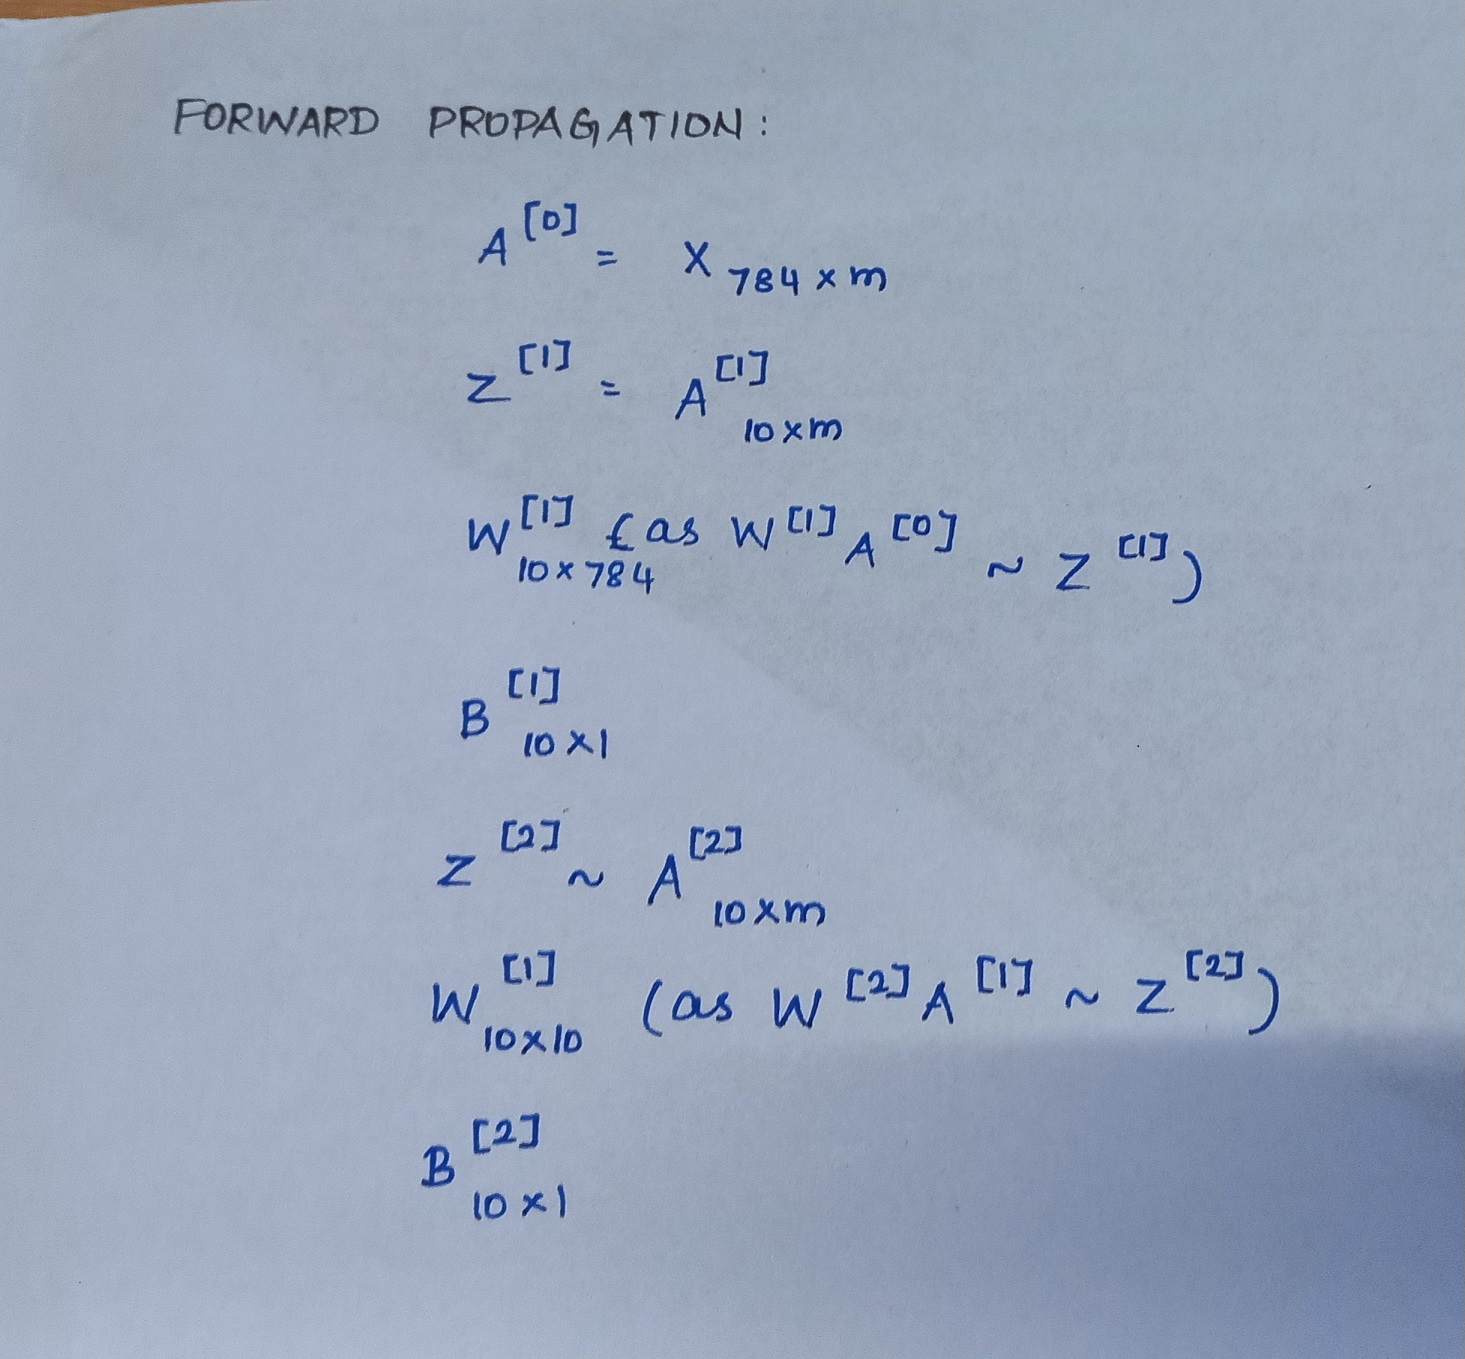

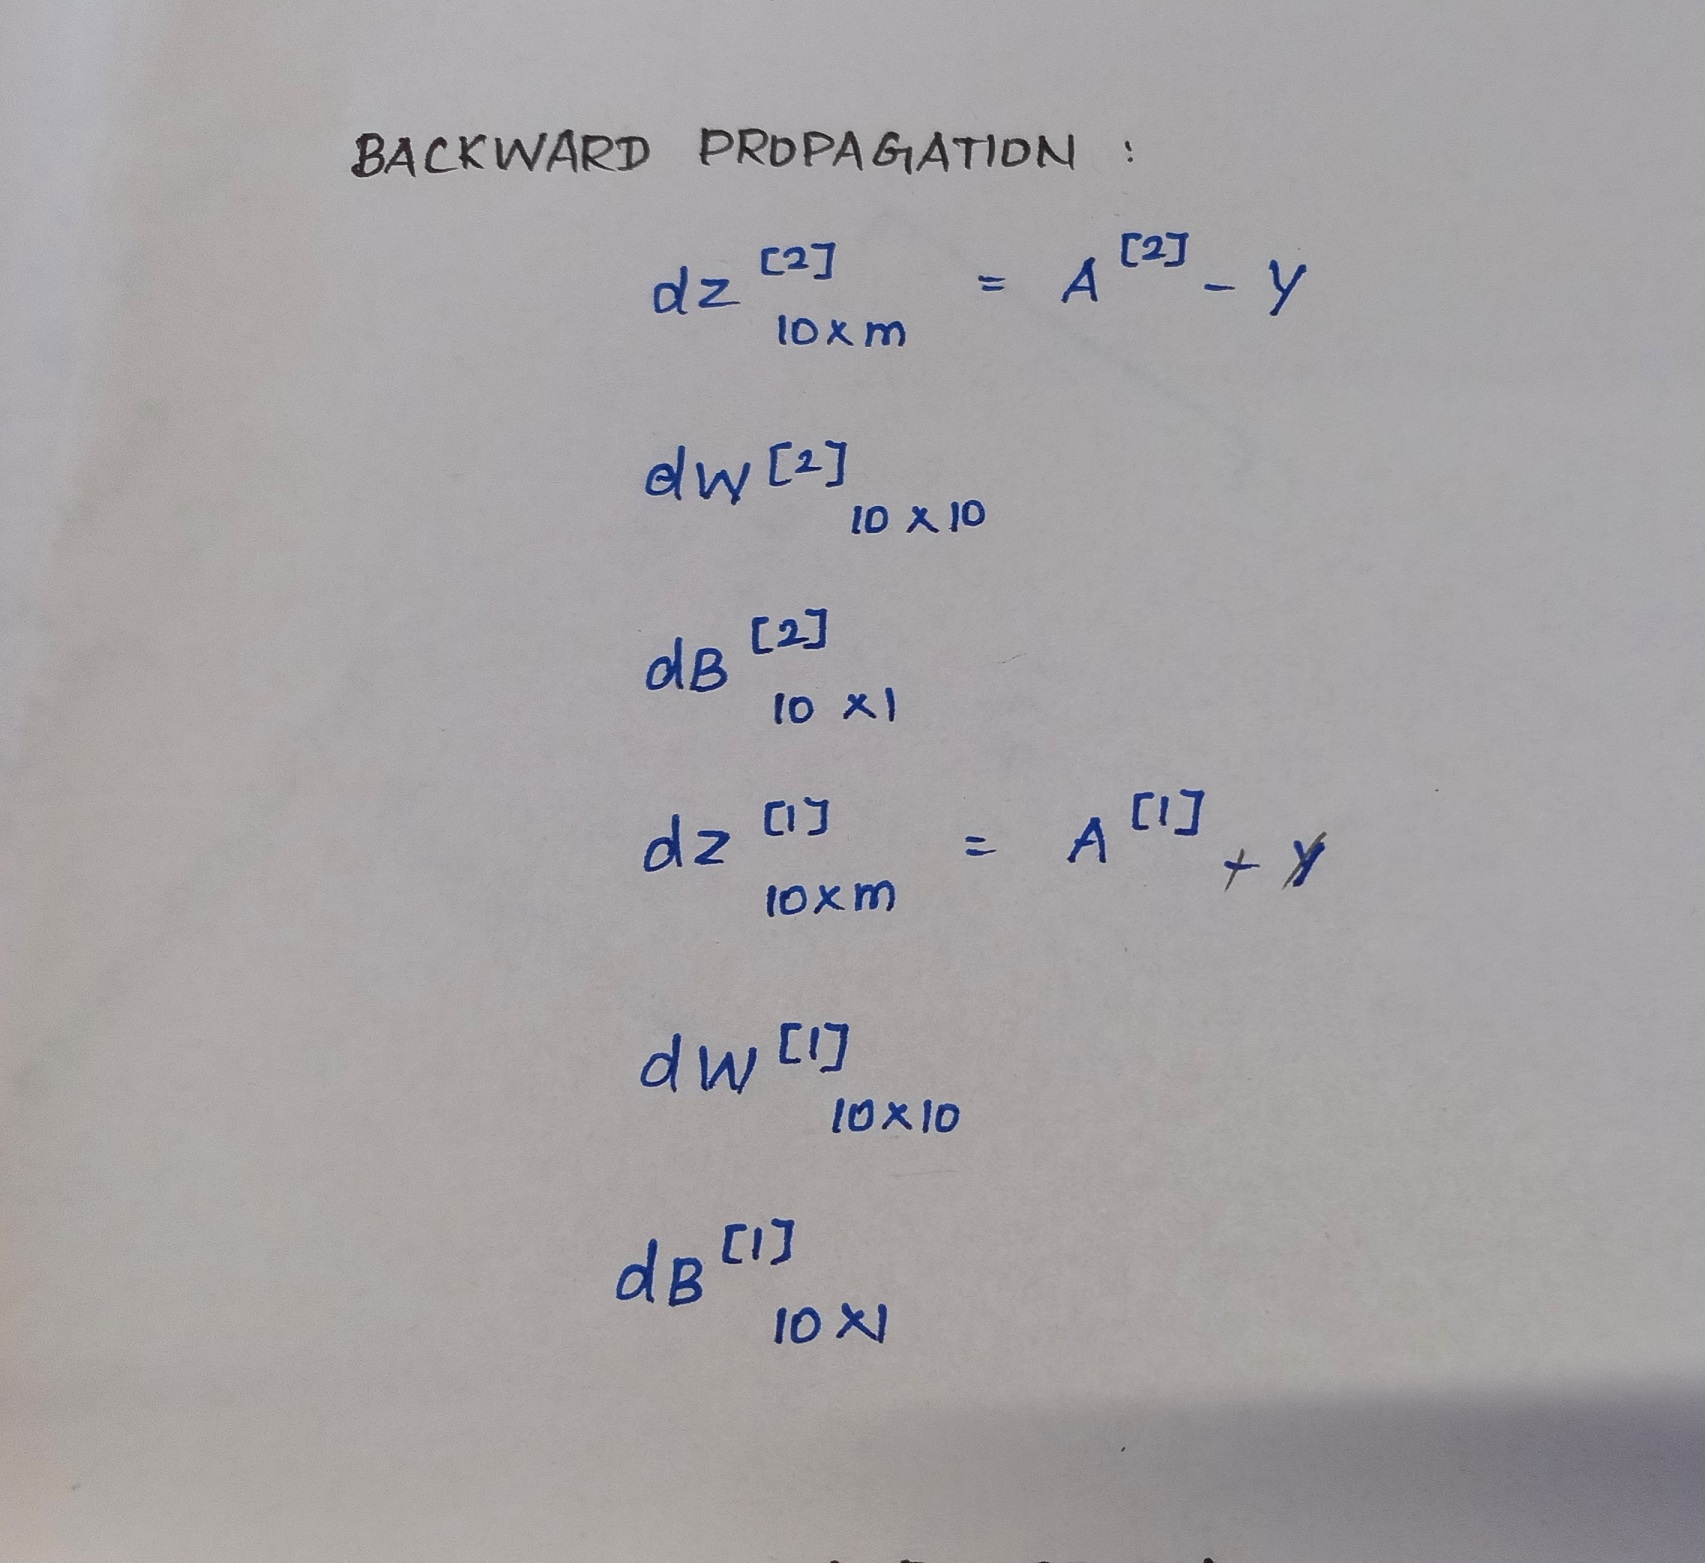

In [ ]:
W1, b1, W2, b2 = gradient_descent(Train_X, Train_Y, 0.10, 500)

Iteration:  0
[2 6 8 ... 2 6 8] [1 6 0 ... 4 4 0]
0.08185365853658537
Iteration:  10
[2 2 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.1918780487804878
Iteration:  20
[2 2 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.26482926829268294
Iteration:  30
[2 0 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.32846341463414636
Iteration:  40
[2 0 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.38109756097560976
Iteration:  50
[2 6 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.434390243902439
Iteration:  60
[2 6 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.4871951219512195
Iteration:  70
[2 6 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.5303658536585366
Iteration:  80
[2 6 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.568170731707317
Iteration:  90
[2 6 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.6
Iteration:  100
[2 6 0 ... 2 4 0] [1 6 0 ... 4 4 0]
0.6275609756097561
Iteration:  110
[2 6 0 ... 4 4 0] [1 6 0 ... 4 4 0]
0.6520487804878049
Iteration:  120
[2 6 0 ... 4 4 0] [1 6 0 ... 4 4 0]
0.6738536585365854
Iteration:  130
[2 6 0 ... 4 4 0] [1 6 0 ... 4 4 0]
0.6939756097560975
Iteration:  140
[2 6 0 ... 4 4

Prediction:  [1]
Label:  1


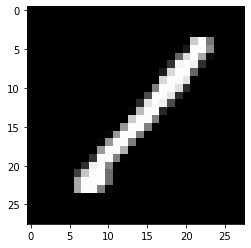

Prediction:  [6]
Label:  6


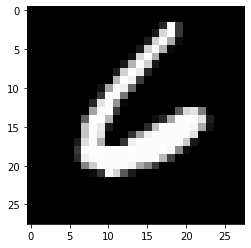

Prediction:  [0]
Label:  0


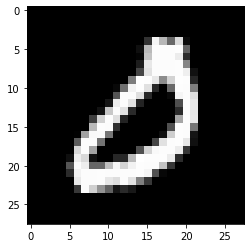

Prediction:  [2]
Label:  2


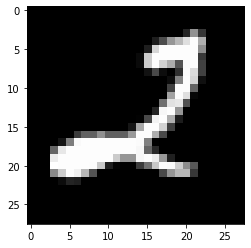

Prediction:  [4]
Label:  4


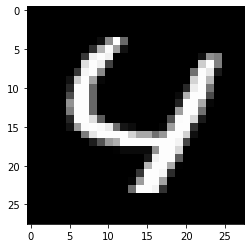

Prediction:  [2]
Label:  2


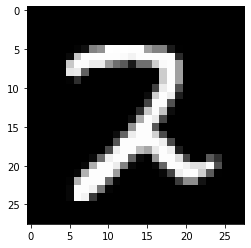

Prediction:  [6]
Label:  6


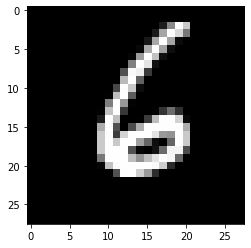

Prediction:  [7]
Label:  7


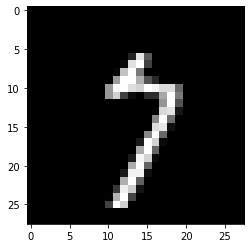

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(Test_X, W1, b1, W2, b2)
get_accuracy(dev_predictions, Test_Y)

[0 4 4 9 7 7 3 0 0 3 1 5 7 4 0 5 6 6 4 6 7 4 5 4 4 1 1 7 8 1 8 6 5 3 2 6 4
 3 0 1 0 7 4 1 8 9 0 9 3 1 6 1 1 4 5 7 0 9 4 8 6 0 6 7 8 3 7 2 3 4 0 3 3 4
 4 1 2 9 6 0 7 9 8 1 7 6 9 3 9 7 5 6 3 1 0 0 9 2 6 7 6 9 1 6 2 3 2 6 5 0 6
 9 8 9 9 4 7 9 0 1 7 7 2 5 3 0 8 3 7 9 8 0 9 4 6 9 7 2 8 1 7 9 2 8 2 0 0 7
 4 6 0 2 5 9 4 4 7 7 8 0 0 5 6 2 8 5 7 3 1 7 2 9 0 1 1 8 7 7 9 9 9 2 3 9 2
 9 0 6 7 2 6 9 1 0 8 2 0 1 8 2 5 4 4 8 1 6 6 4 6 4 3 1 5 8 1 6 0 0 3 0 7 6
 2 1 5 6 2 8 7 8 5 6 9 5 3 4 2 0 3 8 5 1 5 8 2 7 0 4 0 4 7 5 0 9 3 1 8 2 5
 2 1 7 7 1 8 2 8 2 6 8 7 6 5 7 8 2 7 9 3 9 5 4 7 1 6 8 4 2 9 8 1 7 5 3 7 4
 7 7 7 7 6 6 2 6 5 4 7 3 9 6 4 8 6 4 0 2 7 4 4 6 3 1 3 7 9 3 0 3 2 0 3 4 6
 8 5 6 0 9 1 8 3 3 2 8 2 5 0 4 7 8 1 8 7 9 9 0 8 3 0 0 7 0 4 4 5 6 8 1 5 8
 2 0 1 4 4 7 7 0 9 3 4 5 1 9 9 6 3 0 9 6 0 7 5 3 5 5 2 1 5 1 6 9 9 6 1 4 4
 4 2 3 6 5 6 9 1 2 1 4 6 9 2 3 9 3 5 7 8 9 9 7 1 3 0 4 1 3 4 1 9 8 1 3 7 0
 7 8 5 7 1 9 7 4 8 2 1 7 8 8 6 1 5 7 8 6 3 9 8 8 4 4 4 7 5 2 4 8 3 3 8 9 8
 9 2 9 6 8 4 5 8 7 8 0 1 

0.857

--------------------------------------------------------------------------------

References :

1. Towards Data Science
2. Kaggle
3. Edureka

--------------------------------------------------------------------------------